In [1]:
import pyPLUTO as pp
from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np

PyPLUTO version: 1.0   session: Jupyter notebook or qtconsole


In [3]:
# Load PLUTO simulation output data
D = pp.Load(
    'all',          # Load all available output files / time steps
    vars=True,      # Also load primitive variables (rho, v, p, B, etc.)
    datatype='dbl', # Use double-precision data files
    path="/dartfs-hpc/rc/home/7/f007gj7/epaco/libs/gPLUTO/Test_Problems/MHD/Shock_Tubes"  # Directory containing the simulation outputs
)

# Select a specific time frame (same index will be used for all variables)
i = 1              # Frame index (e.g., second output snapshot)
x = D.x1           # 1D spatial grid along the x-direction

# Bundle selected variables together with LaTeX-style labels for plotting
vars_data_hll = [
    (D.rho[i],  r'$\rho$'),   # Mass density
    (D.Bx2[i],  r'$B_y$'),    # Transverse magnetic field component By
    (D.Bx3[i],  r'$B_z$'),    # Transverse magnetic field component Bz
    (D.prs[i],  r'$p$'),      # Thermal pressure
    (D.vx1[i],  r'$v_x$'),    # Velocity component in x-direction
    (D.vx2[i],  r'$v_y$'),    # Velocity component in y-direction
]


Load: folder /dartfs-hpc/rc/home/7/f007gj7/epaco/libs/gPLUTO/Test_Problems/MHD/Shock_Tubes,     output [0, 1]


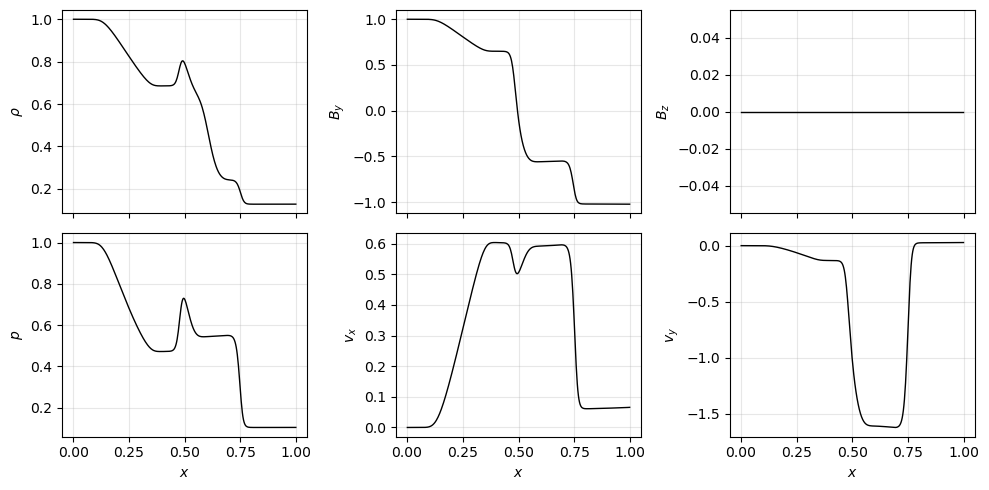

In [4]:
# Create figure
fig, axes = plt.subplots(2, 3, figsize=(10, 5), sharex=True)

for ax, (data, label) in zip(axes.flat, vars_data_hll):
    ax.plot(x, data, color='black', lw=1)
    # ax.scatter(
    #     x, data,
    #     s=10,
    #     facecolors='none',
    #     edgecolors='black'
    # )
    ax.set_ylabel(label)
    ax.grid(alpha=0.3)


# X labels only on bottom row
for ax in axes[1, :]:
    ax.set_xlabel(r'$x$')

plt.tight_layout()
plt.show()